In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('../world-data-2023.csv')

In [5]:
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [6]:
df.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [7]:
df.shape

(195, 35)

In [8]:
df.isnull().mean() * 100

Country                                       0.000000
Density\n(P/Km2)                              0.000000
Abbreviation                                  3.589744
Agricultural Land( %)                         3.589744
Land Area(Km2)                                0.512821
Armed Forces size                            12.307692
Birth Rate                                    3.076923
Calling Code                                  0.512821
Capital/Major City                            1.538462
Co2-Emissions                                 3.589744
CPI                                           8.717949
CPI Change (%)                                8.205128
Currency-Code                                 7.692308
Fertility Rate                                3.589744
Forested Area (%)                             3.589744
Gasoline Price                               10.256410
GDP                                           1.025641
Gross primary education enrollment (%)        3.589744
Gross tert

In [9]:
df.duplicated().sum()

0

In [10]:
# Now, we are selectijn gthose important columns, which are required to cluster the counutries, only
important_columns = ['Country', 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size', 'CPI', 'GDP', 'Tax revenue (%)', 'Unemployment rate']
df = df[important_columns]

In [11]:
df

,Country,Agricultural Land( %),Land Area(Km2),Armed Forces size,CPI,GDP,Tax revenue (%),Unemployment rate
0,Afghanistan,58.10%,"652,230","323,000",149.9,"$19,101,353,833",9.30%,11.12%
1,Albania,43.10%,"28,748","9,000",119.05,"$15,278,077,447",18.60%,12.33%
2,Algeria,17.40%,"2,381,741","317,000",151.36,"$169,988,236,398",37.20%,11.70%
3,Andorra,40.00%,468,NaN,NaN,"$3,154,057,987",NaN,NaN
4,Angola,47.50%,"1,246,700","117,000",261.73,"$94,635,415,870",9.20%,6.89%
...,...,...,...,...,...,...,...,...
190,Venezuela,24.50%,"912,050","343,000","2,740.27","$482,359,318,768",NaN,8.80%
191,Vietnam,39.30%,"331,210","522,000",163.52,"$261,921,244,843",19.10%,2.01%
192,Yemen,44.60%,"527,968","40,000",157.58,"$26,914,402,224",NaN,12.91%
193,Zambia,32.10%,"752,618","16,000",212.31,"$23,064,722,446",16.20%,11.43%


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                195 non-null    object
 1   Agricultural Land( %)  188 non-null    object
 2   Land Area(Km2)         194 non-null    object
 3   Armed Forces size      171 non-null    object
 4   CPI                    178 non-null    object
 5   GDP                    193 non-null    object
 6   Tax revenue (%)        169 non-null    object
 7   Unemployment rate      176 non-null    object
dtypes: object(8)
memory usage: 12.3+ KB


In [13]:
df['Agricultural Land( %)'] = df['Agricultural Land( %)'].str.rstrip('%').astype(float)

In [14]:
df['Land Area(Km2)'] = df['Land Area(Km2)'].str.replace(',', '').astype(float)

In [15]:
df['Armed Forces size'] = df['Armed Forces size'].str.replace(',', '').astype(float)

In [16]:
df['CPI'] = df['CPI'].str.replace(',', '').astype(float)

In [17]:
df['GDP'] = df['GDP'].str.replace(',', '')
df['GDP'] = df['GDP'].str.replace('$', '')

In [18]:
df['GDP'] = df['GDP'].astype(float)

In [19]:
df['Tax revenue (%)'] = df['Tax revenue (%)'].str.rstrip('%').astype(float)

In [20]:
df['Unemployment rate'] = df['Unemployment rate'].str.rstrip('%').astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                195 non-null    object 
 1   Agricultural Land( %)  188 non-null    float64
 2   Land Area(Km2)         194 non-null    float64
 3   Armed Forces size      171 non-null    float64
 4   CPI                    178 non-null    float64
 5   GDP                    193 non-null    float64
 6   Tax revenue (%)        169 non-null    float64
 7   Unemployment rate      176 non-null    float64
dtypes: float64(7), object(1)
memory usage: 12.3+ KB


In [22]:
def create_scatterplot_boxplot(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    num_plots = len(numerical_columns)
    
    fig, axes = plt.subplots(nrows=num_plots, ncols=2, figsize=(15, num_plots * 5))  # Adjust figsize as needed
    
    for i, column in enumerate(numerical_columns):
        sns.scatterplot(x=df[column], y=df['GDP'], ax=axes[i, 0])
        sns.boxplot(x=df[column], y=df['GDP'], ax=axes[i, 1])
        axes[i, 0].set_title(f'Scatterplot with GDP ({column} vs GDP)')
        axes[i, 1].set_title(f'Boxplot ({column})')

    plt.tight_layout()
    plt.show()

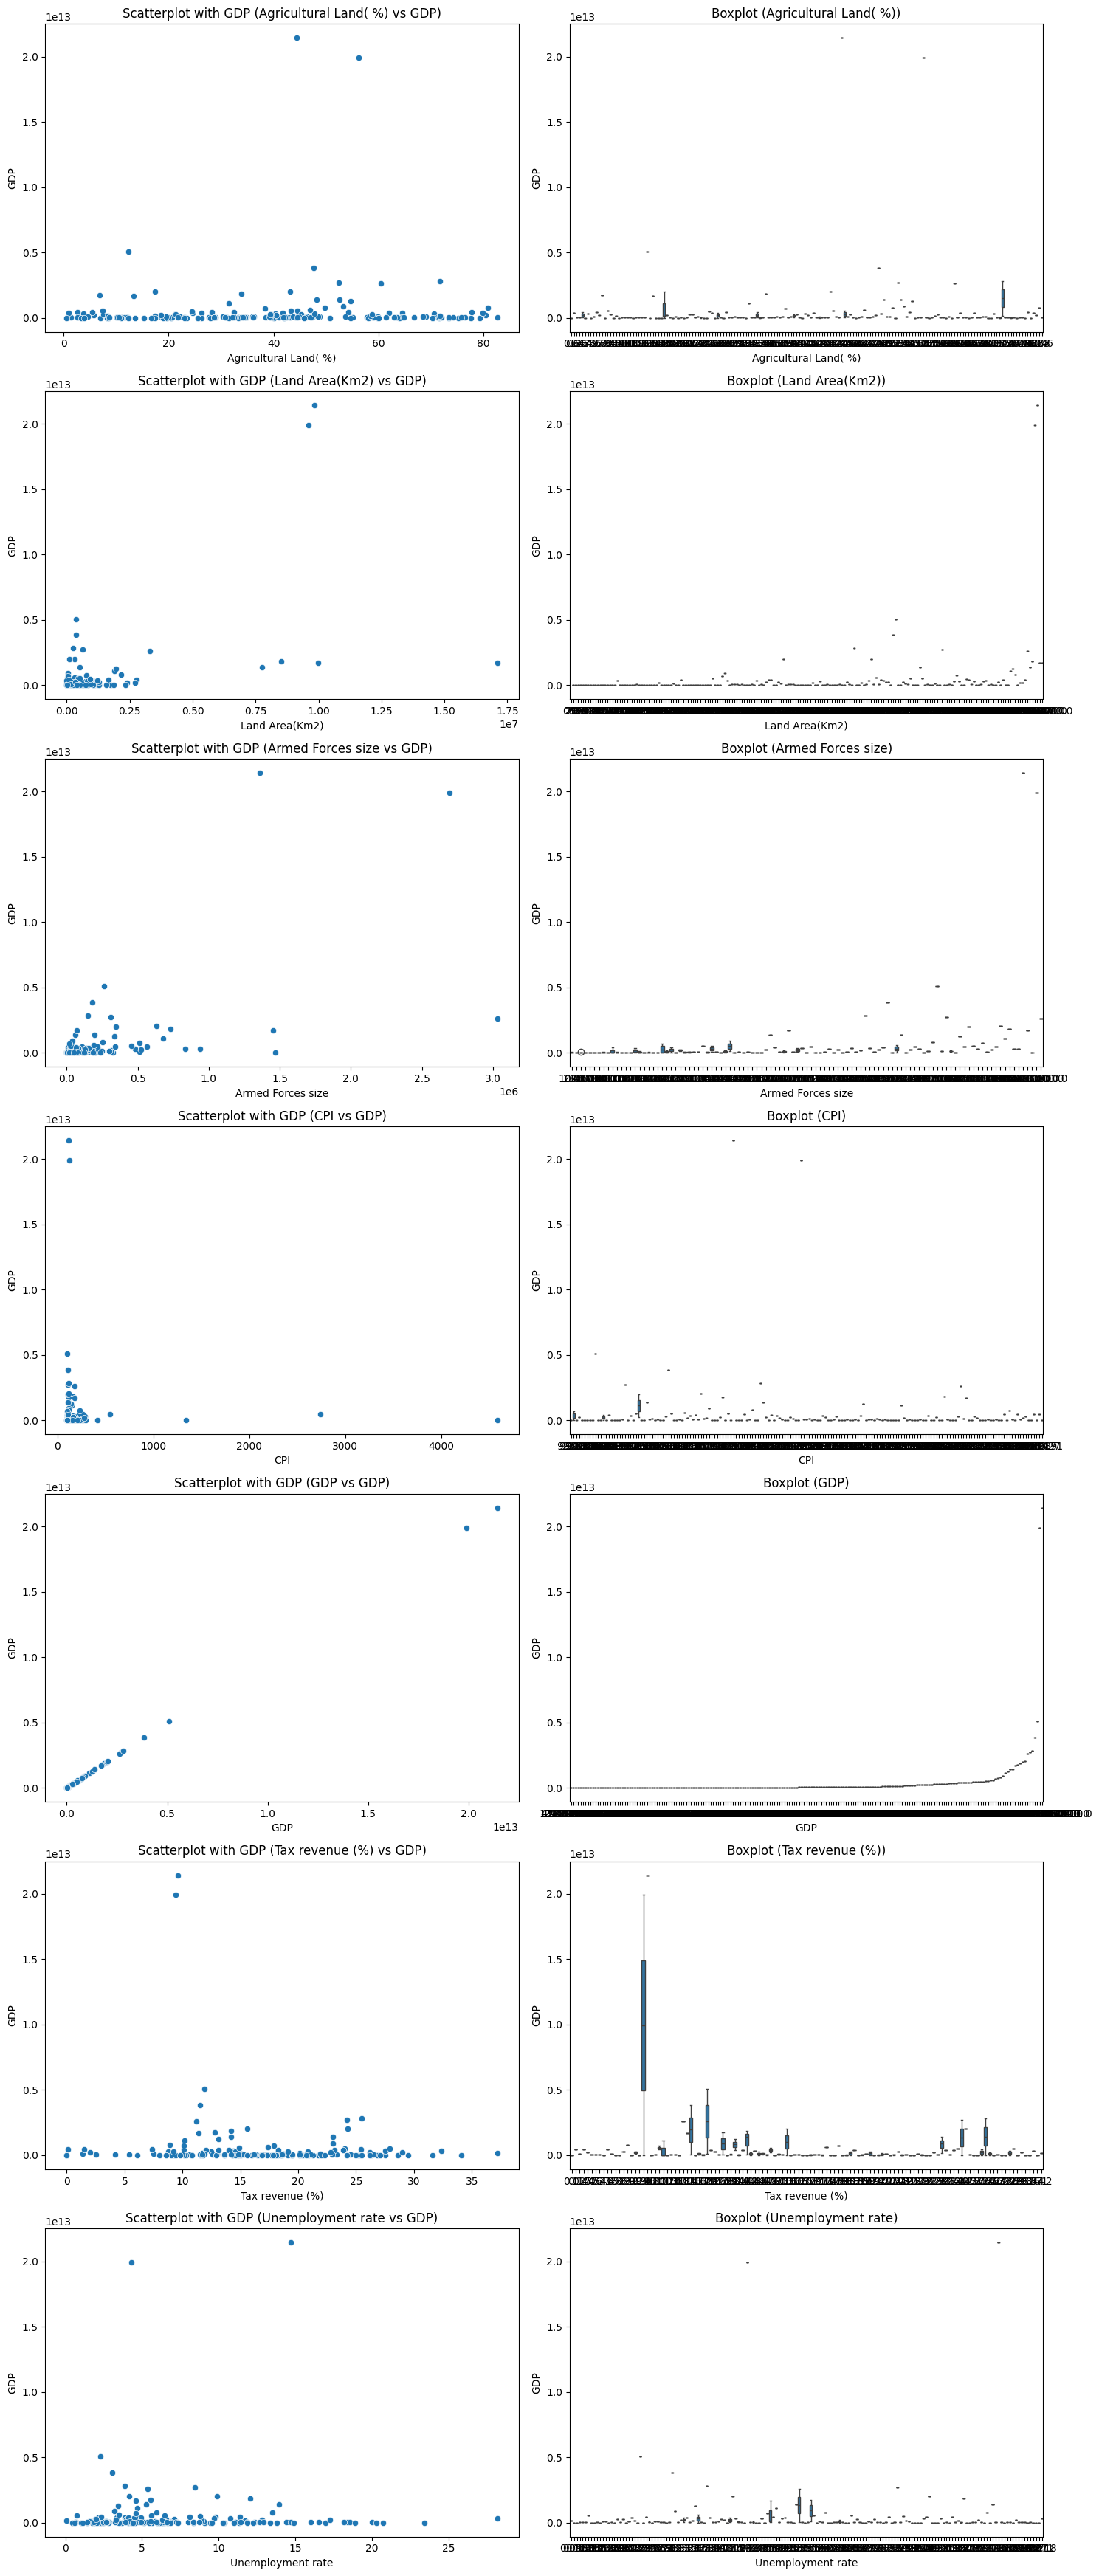

In [23]:
create_scatterplot_boxplot(df)

In [24]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

<Axes: >

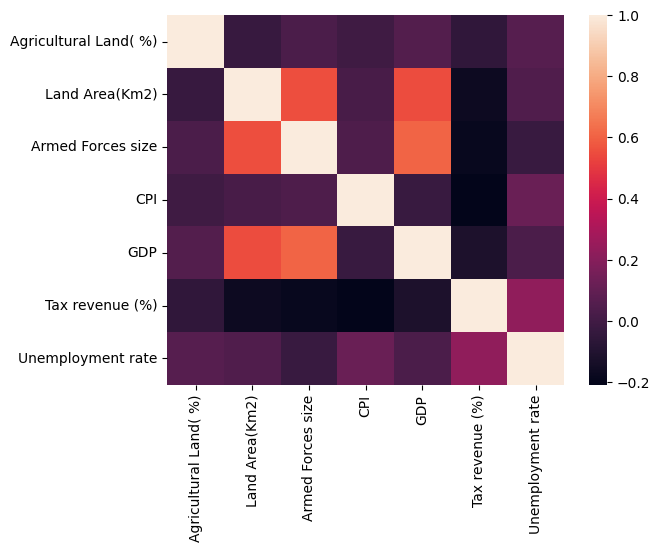

In [25]:
sns.heatmap(df[numerical_columns].corr())

In [26]:
df = df.drop(columns=['CPI', 'Tax revenue (%)'], axis=1)

In [27]:
df.isnull().sum()

Country                   0
Agricultural Land( %)     7
Land Area(Km2)            1
Armed Forces size        24
GDP                       2
Unemployment rate        19
dtype: int64

In [28]:
si = SimpleImputer(strategy='mean')

df['Agricultural Land( %)'] = si.fit_transform(df['Agricultural Land( %)'].values.reshape(-1, 1))
df['Land Area(Km2)'] = si.fit_transform(df['Land Area(Km2)'].values.reshape(-1, 1))
df['Armed Forces size'] = si.fit_transform(df['Armed Forces size'].values.reshape(-1, 1))
df['GDP'] = si.fit_transform(df['GDP'].values.reshape(-1, 1))
df['Unemployment rate'] = si.fit_transform(df['Unemployment rate'].values.reshape(-1, 1))

In [29]:
df.isnull().sum()

Country                  0
Agricultural Land( %)    0
Land Area(Km2)           0
Armed Forces size        0
GDP                      0
Unemployment rate        0
dtype: int64

In [30]:
df

,Country,Agricultural Land( %),Land Area(Km2),Armed Forces size,GDP,Unemployment rate
0,Afghanistan,58.1,652230.0,323000.000000,1.910135e+10,11.120000
1,Albania,43.1,28748.0,9000.000000,1.527808e+10,12.330000
2,Algeria,17.4,2381741.0,317000.000000,1.699882e+11,11.700000
3,Andorra,40.0,468.0,159274.853801,3.154058e+09,6.886364
4,Angola,47.5,1246700.0,117000.000000,9.463542e+10,6.890000
...,...,...,...,...,...,...
190,Venezuela,24.5,912050.0,343000.000000,4.823593e+11,8.800000
191,Vietnam,39.3,331210.0,522000.000000,2.619212e+11,2.010000
192,Yemen,44.6,527968.0,40000.000000,2.691440e+10,12.910000
193,Zambia,32.1,752618.0,16000.000000,2.306472e+10,11.430000


In [31]:
X = df.iloc[:, [1, 2, 3, 4, 5]].values

In [32]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [33]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X_pca)
    wcss.append(km.inertia_)

In [34]:
wcss

[9.059207238936256e+26,
 8.20732928182388e+25,
 2.2201606135404694e+25,
 1.5354203462096768e+25,
 6.60801006457985e+24,
 5.498878800380783e+24,
 3.0744558697252006e+24,
 2.1207073492923908e+24,
 1.4963759206712467e+24,
 7.759622698048785e+23]

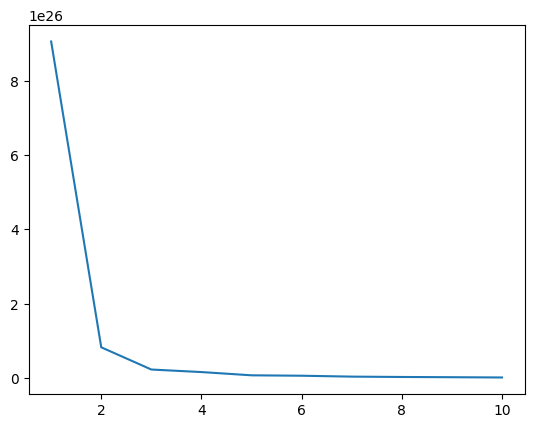

In [35]:
plt.plot(range(1,11),wcss)

In [38]:
#So, the optimum number of cluster we should form is 2, only 2
km = KMeans(n_clusters=3)
y_means = km.fit_predict(X_pca)

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_pca, km.labels_)
print(silhouette_avg)

0.8851983977683803


In [ ]:
y_means

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
X_pca[0][0]

-458194547566.48456

In [ ]:
new_df = pd.DataFrame()

new_df['col1'] = X_pca[:,0]
new_df['col2'] = X_pca[:,1]
new_df['col3'] = X_pca[:,2]
new_df['label'] = y_means

cluster = pd.DataFrame()
cluster['Feature_1'] = X_pca[:,0]
cluster['Feature_2'] = X_pca[:,1]
cluster['Feature_2'] = X_pca[:,2]
cluster['Cluster'] = y_means

cluster.to_csv('cluster.csv', index=False)

In [ ]:
new_df

,col1,col2,col3,label
0,-4.581945e+11,1.982795e+05,198006.626650,0
1,-4.620178e+11,-4.407081e+05,-78503.546687,0
2,-3.073077e+11,1.850026e+06,79621.250360,0
3,-4.741418e+11,-4.541198e+05,74031.038310,0
4,-3.826605e+11,7.423494e+05,-47941.523844,0
...,...,...,...,...
190,5.063417e+09,2.303508e+05,169965.255555,0
191,-2.153747e+11,-2.302354e+05,398393.905366,0
192,-4.503815e+11,5.373203e+04,-77745.549290,0
193,-4.542312e+11,2.784799e+05,-114646.987069,0


In [ ]:
fig = px.scatter_3d(new_df,x='col1', y='col2', z='col3', color='label')
fig.show()

In [ ]:
selected_countries_0 = df[new_df['label'].isin([0])]['Country']
selected_countries_1 = df[new_df['label'].isin([1])]['Country']
selected_countries_2 = df[new_df['label'].isin([2])]['Country']

countries_label_0 = new_df[new_df['label'] == 0]
countries_label_1 = new_df[new_df['label'] == 1]
countries_label_2 = new_df[new_df['label'] == 2]

<Axes: ylabel='GDP'>

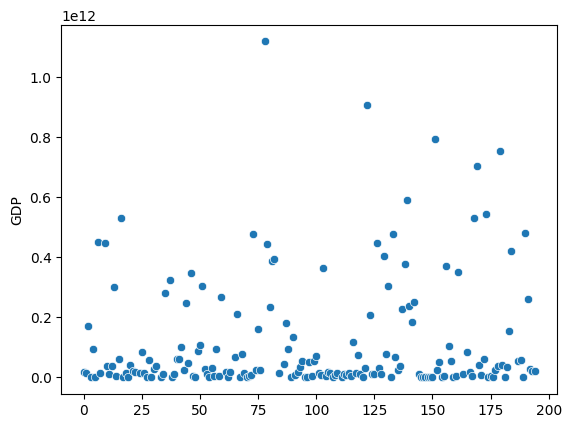

In [ ]:
#GDP of those countries which are classified as 0
sns.scatterplot(x=df.loc[countries_label_0.index]['GDP'].index, y=df.loc[countries_label_0.index]['GDP'])

<Axes: ylabel='GDP'>

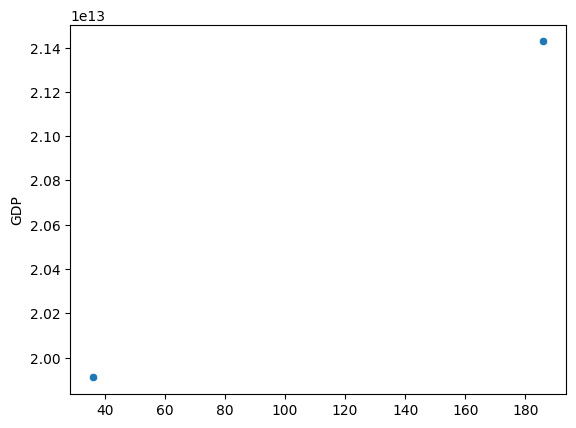

In [ ]:
#GDP of those countries which are classified as 1
sns.scatterplot(x=df.loc[countries_label_1.index]['GDP'].index, y=df.loc[countries_label_1.index]['GDP'])

<Axes: xlabel='GDP', ylabel='GDP'>

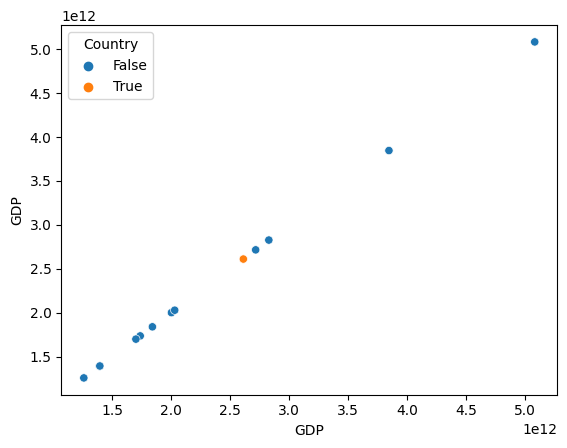

In [ ]:
#GDP of those countries which are classified as 2
is_india = df['Country'] == 'India'
sns.scatterplot(x=df.loc[countries_label_2.index]['GDP'], y=df.loc[countries_label_2.index]['GDP'], hue=is_india)

In [ ]:
selected_countries_2 == 'India'

8      False
23     False
32     False
60     False
64     False
77      True
83     False
85     False
110    False
143    False
162    False
164    False
185    False
Name: Country, dtype: bool

In [ ]:
#So, Bye we have done all of our work! Thanks for watching!